In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/[2024-1] EURON 6기/data'

/content/drive/MyDrive/[2024-1] EURON 6기/data


### Matrices

In [3]:
import numpy as np

# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array)  # 2x3 array
print("Array Type: {}".format(type(first_array)))
print("Array Shape: {}".format(first_array.shape))
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [5]:
import torch

# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type))
print("Array Shape: {}".format(tensor.shape))
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7aedf7a5ce00>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [7]:
# numpy ones
print(np.ones((2,3)))

# pytorch ones
print(torch.ones((2,3)))

# numpy random
print(np.random.randn(2,3))

# pytorch random
print(torch.randn(2,3))

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]])
[[-0.26817853  0.4674045  -0.51071258]
 [ 1.12657144 -0.63650062  1.04753918]]
tensor([[ 1.8132, -1.7754, -1.2270],
        [ 0.7648,  1.2259,  1.7510]])


In [9]:
array = np.random.rand(2,2)
print(array, type(array))

# from numpy to tensor
n_to_t = torch.from_numpy(array)
print(n_to_t)

# from tensor to numpy
tensor = n_to_t
t_to_n = tensor.numpy()
print(t_to_n, type(t_to_n))

[[0.89367177 0.09742389]
 [0.39513343 0.9222613 ]] <class 'numpy.ndarray'>
tensor([[0.8937, 0.0974],
        [0.3951, 0.9223]], dtype=torch.float64)
[[0.89367177 0.09742389]
 [0.39513343 0.9222613 ]] <class 'numpy.ndarray'>


### Basic Math with Pytorch

In [17]:
tensor = torch.ones(3,3)
print(tensor,'\n')

# resize : view()
print(tensor.view(9).shape, tensor.view(9),'\n')

# addition : torch.add(a,b)
print(torch.add(tensor, tensor),'\n')

# subtraction : a.sub(tensor)
print(tensor.sub(tensor),'\n')

# element-wise multiplication : torch.mul(a,b)
print(torch.mul(tensor, tensor),'\n')

# element-wise division : torch.div(a,b)
print(torch.div(tensor, tensor),'\n')

# mean
tensor = torch.Tensor([1,2,3,4,5])
print(tensor.mean(),'\n')

# std
print(tensor.std())

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

torch.Size([9]) tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.]) 

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]]) 

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

tensor(3.) 

tensor(1.5811)


### Variables

In [18]:
from torch.autograd import Variable

var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

In [20]:
# lets make basic backward propagation
# equation : y=x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print("y =",y)

# o=1/2*sum(y)
o = (1/2)*sum(y)
print("o =", o)

# backward
o.backward()  # gradients 계산

print("gradients : ", x.grad)

y = tensor([ 4., 16.], grad_fn=<PowBackward0>)
o = tensor(10., grad_fn=<MulBackward0>)
gradients :  tensor([2., 4.])


### Linear Regression

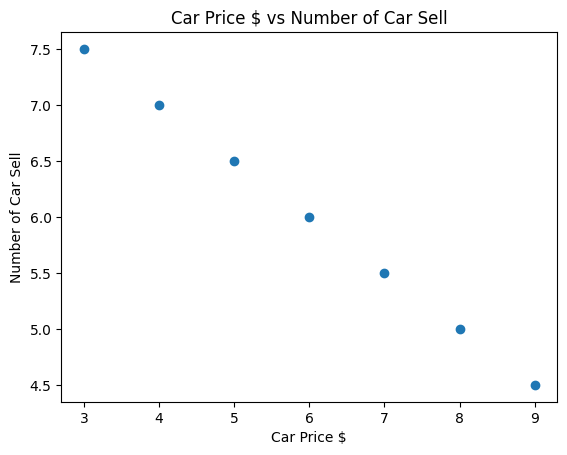

In [24]:
# define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array, dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)  # (7,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# define # of car sell
number_of_car_sell_array = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array, dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)  # (7,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# visualize
import matplotlib.pyplot as plt
plt.scatter(car_prices_array, number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price $ vs Number of Car Sell")
plt.show()

[Steps of Linear Regression]
1. create LinearRegression class
2. define model from this LinearRegression class
3. MSE: Mean Squared Error
4. Optimization (SGD)
5. Backpropagation
6. Prediction

epoch 0, loss 9.935559272766113
epoch 50, loss 6.254772663116455
epoch 100, loss 4.226611137390137
epoch 150, loss 2.8560984134674072
epoch 200, loss 1.9299856424331665
epoch 250, loss 1.3041726350784302
epoch 300, loss 0.8812842965126038
epoch 350, loss 0.5955201983451843
epoch 400, loss 0.4024184048175812
epoch 450, loss 0.2719307839870453
epoch 500, loss 0.18375487625598907
epoch 550, loss 0.12417103350162506
epoch 600, loss 0.08390705287456512
epoch 650, loss 0.056699540466070175
epoch 700, loss 0.0383143313229084
epoch 750, loss 0.02589062973856926
epoch 800, loss 0.017495296895503998
epoch 850, loss 0.011822333559393883
epoch 900, loss 0.00798873696476221
epoch 950, loss 0.005398206878453493
epoch 1000, loss 0.0036477160174399614


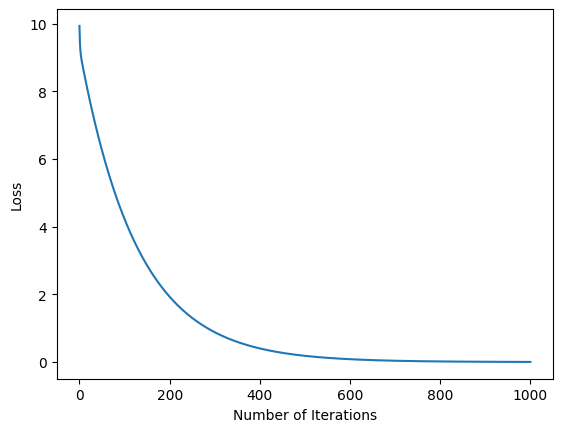

In [25]:
# import libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
import warnings
warnings.filterwarnings("ignore")

# 1. create class
class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.linear(x)

# 2. define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)  # X[7,1] @ W[1,1] + b[1,1]

# 3. MSE
mse = nn.MSELoss()

# 4. Optimization
lr = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# 5. train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
  optimizer.zero_grad()
  results = model(car_price_tensor)
  loss = mse(results, number_of_car_sell_tensor)
  loss.backward()
  optimizer.step()
  loss_list.append(loss.data)

  if(iteration % 50 == 0):
    print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number), loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

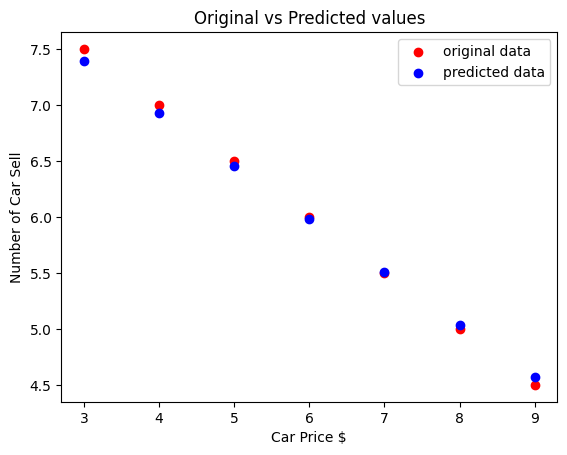

In [26]:
# predict
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, number_of_car_sell_array, label="original data", color="red")
plt.scatter(car_prices_array, predicted, label='predicted data', color='blue')

plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

### Logistic Regression

[Steps of Logistic Regression]
1. Import Libraries
2. Prepare Dataset
  - MNIST : 28x28 images, 0 to 9 labels
  - train 80%, test 20% split
  - batch_size, epoch
  - TensorDataset(), DataLoader()
3. Create Logistic Regression Model
4. Instantiate Model
  - input_dim = 28 x 28
  - output_dim = 10
5. Instantiate Loss
  - Cross-Entropy Loss
  - softmax
6. Instantiate Optimizer
  - SGD
7. Traning the Model
8. Prediction

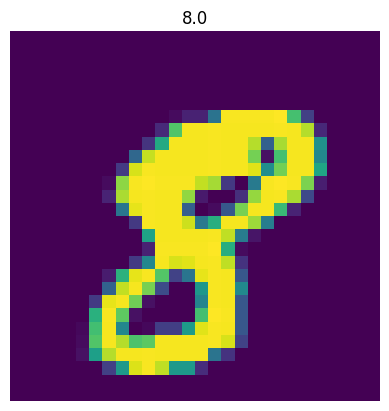

In [28]:
# 1. Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

# 2. Prepare Dataset
# load data
train = pd.read_csv("./train.csv", dtype=np.float32)

# split features/targets
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255  # normalization

# train/test split
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                              targets_numpy,
                                                                              test_size=0.2,
                                                                              random_state=42)

featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

# batch_size, epoch, iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Dataset
train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

# Data Loader
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

# visualize
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis('off')
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [31]:
# 3. Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out = self.linear(x)
    return out

# 4. Instantiate Model
input_dim = 28*28
output_dim = 10
model = LogisticRegressionModel(input_dim, output_dim)  # X[1,784] @ W[784,10] + b[1,10]

# 5. Instantiate Loss
error = nn.CrossEntropyLoss()

# 6. Instantiate Optimizer
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# 7. Training the model
count = 0
loss_list = []
iteration_list = []

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    train = Variable(images.view(-1,28*28))
    labels = Variable(labels)

    optimizer.zero_grad()
    outputs = model(train)
    loss = error(outputs, labels)
    loss.backward()
    optimizer.step()
    count += 1
    if count % 50 == 0:
      correct = 0
      total = 0
      for images, labels in test_loader:
        test = Variable(images.view(-1, 28*28))
        outputs = model(test)
        predicted = torch.max(outputs.data, 1)[1]
        total += len(labels)
        correct += (predicted==labels).sum()

      accuracy = 100 * correct / float(total)
      loss_list.append(loss.data)
      iteration_list.append(count)

    if count % 500 == 0:
      print("Iteration: {} Loss: {} Accuracy: {}".format(count, loss.data, accuracy))

Iteration: 500 Loss: 1.8484257459640503 Accuracy: 66.60713958740234
Iteration: 1000 Loss: 1.6291354894638062 Accuracy: 75.27381134033203
Iteration: 1500 Loss: 1.3036167621612549 Accuracy: 78.20237731933594
Iteration: 2000 Loss: 1.2114182710647583 Accuracy: 80.0
Iteration: 2500 Loss: 1.0509960651397705 Accuracy: 81.0952377319336
Iteration: 3000 Loss: 0.9288066029548645 Accuracy: 81.76190185546875
Iteration: 3500 Loss: 0.8997892737388611 Accuracy: 82.22618865966797
Iteration: 4000 Loss: 0.7565820217132568 Accuracy: 82.85713958740234
Iteration: 4500 Loss: 0.9660557508468628 Accuracy: 83.21428680419922
Iteration: 5000 Loss: 0.7986671328544617 Accuracy: 83.71428680419922
Iteration: 5500 Loss: 0.7594983577728271 Accuracy: 84.02381134033203
Iteration: 6000 Loss: 0.8772634863853455 Accuracy: 84.39286041259766
Iteration: 6500 Loss: 0.6551721692085266 Accuracy: 84.64286041259766
Iteration: 7000 Loss: 0.7060447931289673 Accuracy: 84.88095092773438
Iteration: 7500 Loss: 0.6362894177436829 Accuracy

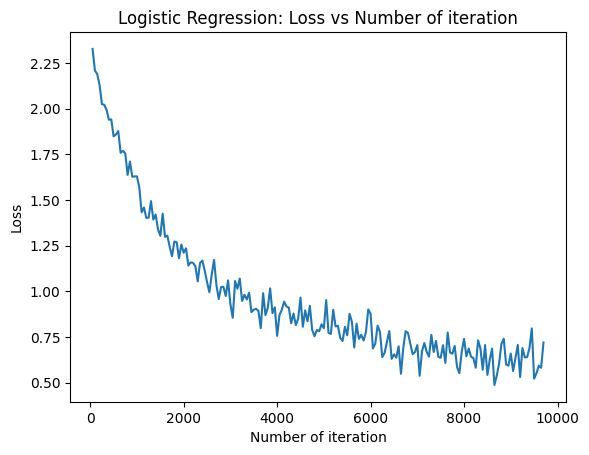

In [32]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

### Artificial Neural Network (ANN)

[Steps of ANN]

1. Import Libraries
2. Prepare Dataset
3. Create ANN Model
  - 3 hidden layers
4. Instantiate Model Class
  - input_dim = 28*28
  - output_dim = 10
  - hidden_dim = 150
5. Instantiate Loss
  - cross-entropy loss
  - softmax
6. Instantiate Optimizer
  - SGD
7. Training the Model
8. Prediction


In [33]:
# 1. Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [34]:
# 3. Create ANN Model
class ANNModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(ANNModel, self).__init__()
    self.fc1 = nn.Linear(input_dim, hidden_dim)  # Z = X[1,784] @ W[784,150] + b[1,150]
    self.relu1 = nn.ReLU()  # A = ReLU(Z)
    self.fc2 = nn.Linear(hidden_dim, hidden_dim)  # Z = A[1,150] @ W[150,150] + b[1,150]
    self.tanh2 = nn.Tanh()  # A = Tanh(Z)
    self.fc3 = nn.Linear(hidden_dim, hidden_dim)
    self.elu3 = nn.ELU()
    self.fc4 = nn.Linear(hidden_dim, output_dim)  # Z = A[1,150] @ W[150,10] + b[1,10]

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu1(out)
    out = self.fc2(out)
    out = self.tanh2(out)
    out = self.fc3(out)
    out = self.elu3(out)
    out = self.fc4(out)
    return out

In [35]:
# 4. Instantiate ANN
input_dim = 28*28
hidden_dim = 150
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)

In [36]:
# 5. Instantiate Loss
error = nn.CrossEntropyLoss()

# 6. Instantiate Optimizer
lr = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [38]:
# 7. ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    train = Variable(images.view(-1,28*28))
    labels = Variable(labels)

    optimizer.zero_grad()
    outputs = model(train)
    loss = error(outputs, labels)
    loss.backward()
    optimizer.step()
    count += 1
    if count % 50 == 0:
      correct = 0
      total = 0
      for images, labels in test_loader:
        test = Variable(images.view(-1, 28*28))
        outputs = model(test)
        predicted = torch.max(outputs.data, 1)[1]
        total += len(labels)
        correct += (predicted == labels).sum()

      accuracy = 100 * correct / float(total)

      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)

    if count % 500 == 0:
      print("Iteration: {} Loss: {} Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500 Loss: 0.741813063621521 Accuracy: 80.45237731933594%
Iteration: 1000 Loss: 0.4502886235713959 Accuracy: 87.42857360839844%
Iteration: 1500 Loss: 0.23501041531562805 Accuracy: 89.46428680419922%
Iteration: 2000 Loss: 0.2947362959384918 Accuracy: 90.69047546386719%
Iteration: 2500 Loss: 0.3018791079521179 Accuracy: 92.07142639160156%
Iteration: 3000 Loss: 0.1310953050851822 Accuracy: 92.76190185546875%
Iteration: 3500 Loss: 0.2325768917798996 Accuracy: 93.61904907226562%
Iteration: 4000 Loss: 0.0523671880364418 Accuracy: 94.25%
Iteration: 4500 Loss: 0.29732346534729004 Accuracy: 94.54762268066406%
Iteration: 5000 Loss: 0.09221918135881424 Accuracy: 94.85713958740234%
Iteration: 5500 Loss: 0.1864887773990631 Accuracy: 94.92857360839844%
Iteration: 6000 Loss: 0.1891556680202484 Accuracy: 95.04762268066406%
Iteration: 6500 Loss: 0.08946757018566132 Accuracy: 95.44047546386719%
Iteration: 7000 Loss: 0.09903115034103394 Accuracy: 95.86904907226562%
Iteration: 7500 Loss: 0.11627

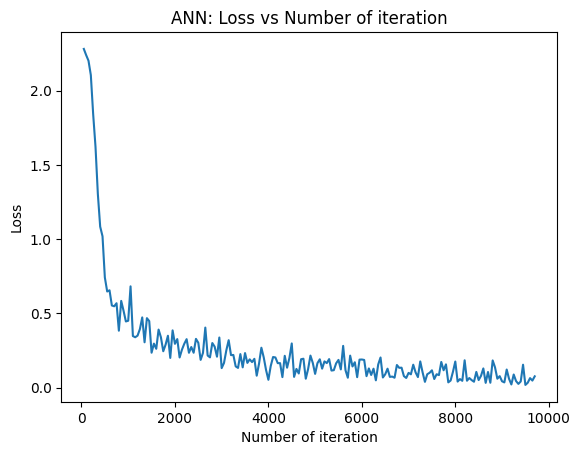

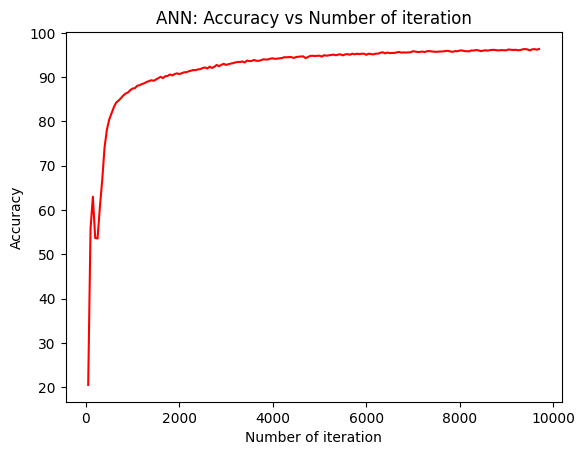

In [39]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

### Convolutional Neural Network (CNN)

1. Import Libraries
2. Prepare Dataset
3. Convolutional layer
  - 2 convolutional layer
  - out_channels = 16 : # of feature map
  - kernel size = 5*5
4. Pooling layer
  - pooling size = 2*2
5. Flattening
6. Fully Connected Layer
7. Instantiate Model Class
8. Instantiate Loss
9. Instantiate Optimizer
10. Traning the Model
11. Prediction

In [40]:
# 1. Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [44]:
# 3~6. Create CNN Model
class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel, self).__init__()
    self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16,
                          kernel_size=5, stride=1, padding=0)  # (16,24,24)
    self.relu1 = nn.ReLU()
    self.maxpool1 = nn.MaxPool2d(kernel_size=2)  # (16,12,12)

    self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32,
                          kernel_size=5, stride=1, padding=0)  # (32,8,8)
    self.relu2 = nn.ReLU()
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)  # (32,4,4)

    self.fc1 = nn.Linear(32*4*4, 10)

  def forward(self, x):
    out = self.cnn1(x)
    out = self.relu1(out)
    out = self.maxpool1(out)
    out = self.cnn2(out)
    out = self.relu2(out)
    out = self.maxpool2(out)
    out = out.view(out.size(0), -1)  # flatten : (32*4*4,1)
    out = self.fc1(out)  # (32*4*4, 10)
    return out

In [45]:
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train)/batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

model = CNNModel()

error = nn.CrossEntropyLoss()

lr = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [46]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    train = Variable(images.view(100, 1, 28, 28))
    labels = Variable(labels)

    optimizer.zero_grad()
    outputs = model(train)
    loss = error(outputs, labels)
    loss.backward()
    optimizer.step()
    count += 1

    if count % 50 == 0:
      correct = 0
      total = 0
      for images, labels in test_loader:
        test = Variable(images.view(100,1,28,28))
        outputs = model(test)
        predicted = torch.max(outputs.data, 1)[1]
        total += len(labels)
        correct += (predicted==labels).sum()

      accuracy = 100 * correct / float(total)

      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)

    if count % 500 == 0:
      print("Iteration: {} Loss: {} Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500 Loss: 0.1206778734922409 Accuracy: 96.0%
Iteration: 1000 Loss: 0.047170475125312805 Accuracy: 97.52381134033203%
Iteration: 1500 Loss: 0.03774257004261017 Accuracy: 97.69047546386719%
Iteration: 2000 Loss: 0.014520304277539253 Accuracy: 98.27381134033203%


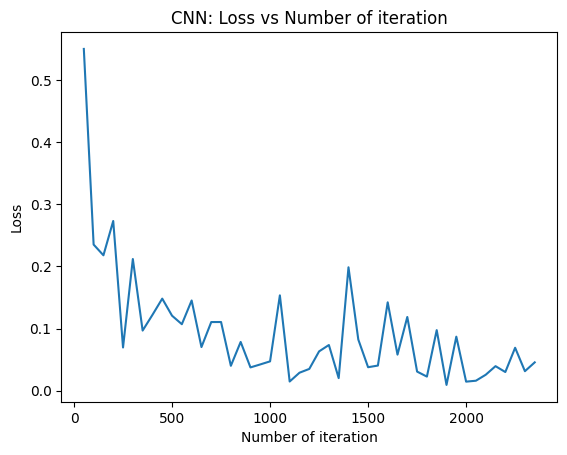

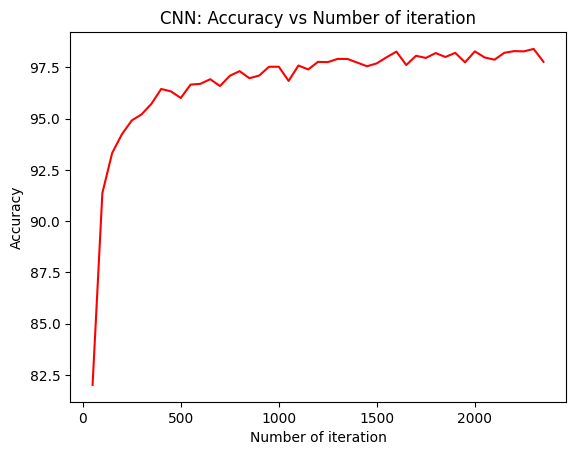

In [47]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()